<a href="https://colab.research.google.com/github/kipsangchepesa/CYBEKA/blob/main/cyb_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [27]:
#Here we import the libraries we will use in the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import streamlit as st

# **Reading Data from our xlsx file**

In [28]:
# Let's read the data from the excel file and create the dataframe we will use

df = pd.read_excel("/content/data v2.xlsx") 
df.head(3)

,start,end,time,minutes,Insert_Geotag_Location,_Insert_Geotag_Location_latitude,_Insert_Geotag_Location_longitude,_Insert_Geotag_Location_altitude,_Insert_Geotag_Location_precision,Name_of_Enumerator,County,_1_Age,_2_Gender,_3_Monthly_Income,_4_Highest_Level_of_Education_Attained,_5_Occupation,_6_Location,_7_Did_you_vote_in_2017,_8_Will_you_vote_in_the_Refere,_9_If_No_Why,_10_How_will_you_vote_in_the_Referendum,_11_If_elections_are_o_would_you_vote_for,_12_If_you_don_t_vot_s_your_second_choice,_13_Do_you_support_BBI,_14_Do_you_know_what_BBI_wants_to_change,_15_Do_you_support_the_Hustler_Nation,_16_Do_you_think_the_ake_brought_us_peace,_17_Who_has_influenc_st_in_your_community,_18_Do_you_trust_your_political_leaders,_19_Do_you_trust_your_religious_leaders,_20_Do_you_trust_your_elders,_21_Where_do_you_get_your_News_from,_22_Have_you_understood_BBI_completely,_23_Will_you_vote_in_2022,__version__,meta/instanceID,_id,_uuid,_submission_time,_index,_parent_table_name,_parent_index,_tags,_notes
0,2021-05-06T09:50:26.433+03:00,2021-05-09T14:07:55.548+03:00,76.291389,4577.483333,0.8350286 34.8646938 1761.797294187769 4.98,0.835029,34.864694,1761.797294,4.980,Daniel Odhiambo,trans_nzoia,25_30,male,kshs_0___11_000,kcpe,hustler,urban,yes,undecided,NaN,still_deciding,raila_odinga,none,thinking_about_it,yes,no_response,no_response,no_one,rarely,never,often,tv,i_don_t_care,response,vxmXBDYW6jJgGL4WrvTb5f,uuid:4ad44fb2-a429-4e7d-a8f1-c367f3068bbb,176970084,4ad44fb2-a429-4e7d-a8f1-c367f3068bbb,2021-05-09T18:30:11,4995,NaN,-1,NaN,NaN
1,2021-05-05T20:41:15.214+03:00,2021-05-08T11:33:45.347+03:00,62.875000,3772.500000,-4.0286687 39.6323594 24.303734045012625 4.78,-4.028669,39.632359,24.303734,4.780,Joshua,mombasa,25_30,male,kshs_11_001__20_000,kcpe,business_owner__hotel_shop_kio,peri_urban,yes,no,i_do_not_understand_bbi,still_deciding,kalonzo_musyoka,musalia_mudavadi,thinking_about_it,no,no,yes,mcas,rarely,rarely,rarely,radio,no,yes,vxmXBDYW6jJgGL4WrvTb5f,uuid:a58205f0-1b13-42a0-878b-cb5c1005cda4,176799145,a58205f0-1b13-42a0-878b-cb5c1005cda4,2021-05-08T16:11:33,1240,NaN,-1,NaN,NaN
2,2021-05-07T10:23:20.976+03:00,2021-05-09T12:34:56.000+03:00,50.193333,3011.600000,-1.3683735 38.0084957 1126.6824783361062 4.921,-1.368373,38.008496,1126.682478,4.921,Brenda Njue,kitui,25_30,female,kshs_20_001__50_000,diploma,formal_employment__teacher_acc,urban,yes,yes,NaN,yes__for_it,raila_odinga,musalia_mudavadi,yes,yes,no,yes,no_one,sometimes,often,always,tv,yes,yes,vxmXBDYW6jJgGL4WrvTb5f,uuid:ad50c639-f6ee-48c7-9496-fa4392073bdb,176894163,ad50c639-f6ee-48c7-9496-fa4392073bdb,2021-05-09T09:39:31,728,NaN,-1,NaN,NaN


# **Accessing information about our Dataset**

In [29]:
#getting to know more about the dataset
def knowledge(data):
  # showing the shape of the dataset
  print("The shape is **********************")
  print(df.shape) 
  print("The information is **********************")
  # showing the info of the dataset
  print(df.info())
  print(" The size is**********************")
  print(df.size)

In [30]:
#calling the function
knowledge(df)  

The shape is **********************
(5736, 44)
The information is **********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736 entries, 0 to 5735
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   start                                      5736 non-null   object 
 1   end                                        5736 non-null   object 
 2   time                                       5736 non-null   float64
 3   minutes                                    5736 non-null   float64
 4   Insert_Geotag_Location                     5736 non-null   object 
 5   _Insert_Geotag_Location_latitude           5736 non-null   float64
 6   _Insert_Geotag_Location_longitude          5736 non-null   float64
 7   _Insert_Geotag_Location_altitude           5736 non-null   float64
 8   _Insert_Geotag_Location_precision          5736 non-null   float64
 9   Name_of

In [31]:
#representation of our data county-wise

z=df.groupby(['County'])['_id'].count().sort_values(ascending=False)
z

County
nairobi        306
trans_nzoia    305
embu           303
machakos       303
nyeri          302
kitui          300
kiambu         298
uasin_gishu    292
kirinyaga      290
laikipia       288
kericho        284
nakuru         282
meru           280
mombasa        280
narok          279
kisumu         277
migori         273
isiolo         269
kisii          267
kakamega       258
Name: _id, dtype: int64

# **Cleaning our Dataset**

# Validity

In [32]:
df

,start,end,time,minutes,Insert_Geotag_Location,_Insert_Geotag_Location_latitude,_Insert_Geotag_Location_longitude,_Insert_Geotag_Location_altitude,_Insert_Geotag_Location_precision,Name_of_Enumerator,County,_1_Age,_2_Gender,_3_Monthly_Income,_4_Highest_Level_of_Education_Attained,_5_Occupation,_6_Location,_7_Did_you_vote_in_2017,_8_Will_you_vote_in_the_Refere,_9_If_No_Why,_10_How_will_you_vote_in_the_Referendum,_11_If_elections_are_o_would_you_vote_for,_12_If_you_don_t_vot_s_your_second_choice,_13_Do_you_support_BBI,_14_Do_you_know_what_BBI_wants_to_change,_15_Do_you_support_the_Hustler_Nation,_16_Do_you_think_the_ake_brought_us_peace,_17_Who_has_influenc_st_in_your_community,_18_Do_you_trust_your_political_leaders,_19_Do_you_trust_your_religious_leaders,_20_Do_you_trust_your_elders,_21_Where_do_you_get_your_News_from,_22_Have_you_understood_BBI_completely,_23_Will_you_vote_in_2022,__version__,meta/instanceID,_id,_uuid,_submission_time,_index,_parent_table_name,_parent_index,_tags,_notes
0,2021-05-06T09:50:26.433+03:00,2021-05-09T14:07:55.548+03:00,76.291389,4577.483333,0.8350286 34.8646938 1761.797294187769 4.98,0.835029,34.864694,1761.797294,4.980,Daniel Odhiambo,trans_nzoia,25_30,male,kshs_0___11_000,kcpe,hustler,urban,yes,undecided,NaN,still_deciding,raila_odinga,none,thinking_about_it,yes,no_response,no_response,no_one,rarely,never,often,tv,i_don_t_care,response,vxmXBDYW6jJgGL4WrvTb5f,uuid:4ad44fb2-a429-4e7d-a8f1-c367f3068bbb,176970084,4ad44fb2-a429-4e7d-a8f1-c367f3068bbb,2021-05-09T18:30:11,4995,NaN,-1,NaN,NaN
1,2021-05-05T20:41:15.214+03:00,2021-05-08T11:33:45.347+03:00,62.875000,3772.500000,-4.0286687 39.6323594 24.303734045012625 4.78,-4.028669,39.632359,24.303734,4.780,Joshua,mombasa,25_30,male,kshs_11_001__20_000,kcpe,business_owner__hotel_shop_kio,peri_urban,yes,no,i_do_not_understand_bbi,still_deciding,kalonzo_musyoka,musalia_mudavadi,thinking_about_it,no,no,yes,mcas,rarely,rarely,rarely,radio,no,yes,vxmXBDYW6jJgGL4WrvTb5f,uuid:a58205f0-1b13-42a0-878b-cb5c1005cda4,176799145,a58205f0-1b13-42a0-878b-cb5c1005cda4,2021-05-08T16:11:33,1240,NaN,-1,NaN,NaN
2,2021-05-07T10:23:20.976+03:00,2021-05-09T12:34:56.000+03:00,50.193333,3011.600000,-1.3683735 38.0084957 1126.6824783361062 4.921,-1.368373,38.008496,1126.682478,4.921,Brenda Njue,kitui,25_30,female,kshs_20_001__50_000,diploma,formal_employment__teacher_acc,urban,yes,yes,NaN,yes__for_it,raila_odinga,musalia_mudavadi,yes,yes,no,yes,no_one,sometimes,often,always,tv,yes,yes,vxmXBDYW6jJgGL4WrvTb5f,uuid:ad50c639-f6ee-48c7-9496-fa4392073bdb,176894163,ad50c639-f6ee-48c7-9496-fa4392073bdb,2021-05-09T09:39:31,728,NaN,-1,NaN,NaN
3,2021-05-08T09:39:09.429+03:00,2021-05-10T11:40:44.380+03:00,50.026389,3001.583333,-1.0162223 34.4802999 1527.0306908686568 4.901,-1.016222,34.480300,1527.030691,4.901,Rita wangechi muthoga,migori,31_35,male,kshs_11_001__20_000,diploma,hustler,urban,no,yes,NaN,yes__for_it,raila_odinga,william_ruto,yes,yes,yes,yes,chief,always,always,always,tv,yes,yes,vxmXBDYW6jJgGL4WrvTb5f,uuid:16410612-f4f4-47b8-b903-c23d9b6fd0f3,177065334,16410612-f4f4-47b8-b903-c23d9b6fd0f3,2021-05-10T09:21:58,5559,NaN,-1,NaN,NaN
4,2021-05-06T09:57:19.279+03:00,2021-05-08T09:58:24.577+03:00,48.018056,2881.083333,-4.0271833 39.6312224 23.717355010810746 4.966,-4.027183,39.631222,23.717355,4.966,Joshua,mombasa,41_50,male,kshs_0___11_000,certificate,informal_employment__jua_kali_,peri_urban,yes,yes,NaN,no__against_it,william_ruto,peter_kenneth,no,yes,yes,no,business_leaders,never,never,never,tv,no,yes,vxmXBDYW6jJgGL4WrvTb5f,uuid:276544bb-535c-4583-a3c8-e5681df8e267,176799148,276544bb-535c-4583-a3c8-e5681df8e267,2021-05-08T16:11:34,3648,NaN,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5731,2021-05-08T15:54:56.476+03:00,2021-05-08T15:55:44.221+03:00,0.013333,0.800000,-0.5889612 34.7939029 1647.3340988251903 2.725,-0.588961,34.793903,1647.334099

In [33]:
df.drop(["start","end", "time ", "minutes", "Insert_Geotag_Location", "_Insert_Geotag_Location_latitude", 
           "_Insert_Geotag_Location_longitude", "_Insert_Geotag_Location_altitude","_Insert_Geotag_Location_precision",
           "Name_of_Enumerator","__version__","meta/instanceID","_id","_uuid","_submission_time","_index","_parent_table_name",
           "_parent_index","_tags","_notes"], axis=1, inplace = True)
# df.columns = df.columns.str.replace(' ', '_')
df.head()

,County,_1_Age,_2_Gender,_3_Monthly_Income,_4_Highest_Level_of_Education_Attained,_5_Occupation,_6_Location,_7_Did_you_vote_in_2017,_8_Will_you_vote_in_the_Refere,_9_If_No_Why,_10_How_will_you_vote_in_the_Referendum,_11_If_elections_are_o_would_you_vote_for,_12_If_you_don_t_vot_s_your_second_choice,_13_Do_you_support_BBI,_14_Do_you_know_what_BBI_wants_to_change,_15_Do_you_support_the_Hustler_Nation,_16_Do_you_think_the_ake_brought_us_peace,_17_Who_has_influenc_st_in_your_community,_18_Do_you_trust_your_political_leaders,_19_Do_you_trust_your_religious_leaders,_20_Do_you_trust_your_elders,_21_Where_do_you_get_your_News_from,_22_Have_you_understood_BBI_completely,_23_Will_you_vote_in_2022
0,trans_nzoia,25_30,male,kshs_0___11_000,kcpe,hustler,urban,yes,undecided,NaN,still_deciding,raila_odinga,none,thinking_about_it,yes,no_response,no_response,no_one,rarely,never,often,tv,i_don_t_care,response
1,mombasa,25_30,male,kshs_11_001__20_000,kcpe,business_owner__hotel_shop_kio,peri_urban,yes,no,i_do_not_understand_bbi,still_deciding,kalonzo_musyoka,musalia_mudavadi,thinking_about_it,no,no,yes,mcas,rarely,rarely,rarely,radio,no,yes
2,kitui,25_30,female,kshs_20_001__50_000,diploma,formal_employment__teacher_acc,urban,yes,yes,NaN,yes__for_it,raila_odinga,musalia_mudavadi,yes,yes,no,yes,no_one,sometimes,often,always,tv,yes,yes
3,migori,31_35,male,kshs_11_001__20_000,diploma,hustler,urban,no,yes,NaN,yes__for_it,raila_odinga,william_ruto,yes,yes,yes,yes,chief,always,always,always,tv,yes,yes
4,mombasa,41_50,male,kshs_0___11_000,certificate,informal_employment__jua_kali_,peri_urban,yes,yes,NaN,no__against_it,william_ruto,peter_kenneth,no,yes,yes,no,business_leaders,never,never,never,tv,no,yes


# Accuracy

In [34]:
knowledge(df)

The shape is **********************
(5736, 24)
The information is **********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736 entries, 0 to 5735
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   County                                     5736 non-null   object
 1   _1_Age                                     5736 non-null   object
 2   _2_Gender                                  5736 non-null   object
 3   _3_Monthly_Income                          5736 non-null   object
 4   _4_Highest_Level_of_Education_Attained     5736 non-null   object
 5   _5_Occupation                              5736 non-null   object
 6   _6_Location                                5736 non-null   object
 7   _7_Did_you_vote_in_2017                    5736 non-null   object
 8   _8_Will_you_vote_in_the_Refere             5736 non-null   object
 9   _9_If_No_Why      

In [35]:
df.columns = df.columns.str.replace('_', ' ')


In [36]:
df.columns = ['County', 'Age', 'Gender', 'Monthly Income',
       'Highest Level of Education Attained', 'Occupation',
       'Location', 'Did you vote in 2017',
       'Will you vote in the Refere', 'If No Why',
       'How will you vote in the Referendum',
       'If elections are today who would you vote for',
       'If you dont vote for that one who is your second choice', 'Do you support BBI',
       'Do you know what BBI wants to change',
       'Do you support the Hustler Nation',
       'Do you think the handshake brought us peace',
       'Who influences youin your community',
       'Do you trust your political leaders',
       'Do you trust your religious leaders',
       'Do you trust your elders', 'Where do you get your News from',
       'Have you understood BBI completely', 'Will you vote in 2022']
df.head()

,County,Age,Gender,Monthly Income,Highest Level of Education Attained,Occupation,Location,Did you vote in 2017,Will you vote in the Refere,If No Why,How will you vote in the Referendum,If elections are today who would you vote for,If you dont vote for that one who is your second choice,Do you support BBI,Do you know what BBI wants to change,Do you support the Hustler Nation,Do you think the handshake brought us peace,Who influences youin your community,Do you trust your political leaders,Do you trust your religious leaders,Do you trust your elders,Where do you get your News from,Have you understood BBI completely,Will you vote in 2022
0,trans_nzoia,25_30,male,kshs_0___11_000,kcpe,hustler,urban,yes,undecided,NaN,still_deciding,raila_odinga,none,thinking_about_it,yes,no_response,no_response,no_one,rarely,never,often,tv,i_don_t_care,response
1,mombasa,25_30,male,kshs_11_001__20_000,kcpe,business_owner__hotel_shop_kio,peri_urban,yes,no,i_do_not_understand_bbi,still_deciding,kalonzo_musyoka,musalia_mudavadi,thinking_about_it,no,no,yes,mcas,rarely,rarely,rarely,radio,no,yes
2,kitui,25_30,female,kshs_20_001__50_000,diploma,formal_employment__teacher_acc,urban,yes,yes,NaN,yes__for_it,raila_odinga,musalia_mudavadi,yes,yes,no,yes,no_one,sometimes,often,always,tv,yes,yes
3,migori,31_35,male,kshs_11_001__20_000,diploma,hustler,urban,no,yes,NaN,yes__for_it,raila_odinga,william_ruto,yes,yes,yes,yes,chief,always,always,always,tv,yes,yes
4,mombasa,41_50,male,kshs_0___11_000,certificate,informal_employment__jua_kali_,peri_urban,yes,yes,NaN,no__against_it,william_ruto,peter_kenneth,no,yes,yes,no,business_leaders,never,never,never,tv,no,yes


In [37]:
df.columns

Index(['County', 'Age', 'Gender', 'Monthly Income',
       'Highest Level of Education Attained', 'Occupation', 'Location',
       'Did you vote in 2017', 'Will you vote in the Refere', 'If No Why',
       'How will you vote in the Referendum',
       'If elections are today who would you vote for',
       'If you dont vote for that one who is your second choice',
       'Do you support BBI', 'Do you know what BBI wants to change',
       'Do you support the Hustler Nation',
       'Do you think the handshake brought us peace',
       'Who influences youin your community',
       'Do you trust your political leaders',
       'Do you trust your religious leaders', 'Do you trust your elders',
       'Where do you get your News from', 'Have you understood BBI completely',
       'Will you vote in 2022'],
      dtype='object')

In [38]:
df["Occupation"].str.replace(r'\W',"")


0                              hustler
1       business_owner__hotel_shop_kio
2       formal_employment__teacher_acc
3                              hustler
4       informal_employment__jua_kali_
                     ...              
5731    cash_crop_farmer_commercial_fi
5732    subsistence_farmer_subsistence
5733    cash_crop_farmer_commercial_fi
5734    formal_employment__teacher_acc
5735    cash_crop_farmer_commercial_fi
Name: Occupation, Length: 5736, dtype: object

In [39]:
for column in df.columns:
     df[column] =   df[column].str.replace(r'\W',"")

In [40]:
df.head()

,County,Age,Gender,Monthly Income,Highest Level of Education Attained,Occupation,Location,Did you vote in 2017,Will you vote in the Refere,If No Why,How will you vote in the Referendum,If elections are today who would you vote for,If you dont vote for that one who is your second choice,Do you support BBI,Do you know what BBI wants to change,Do you support the Hustler Nation,Do you think the handshake brought us peace,Who influences youin your community,Do you trust your political leaders,Do you trust your religious leaders,Do you trust your elders,Where do you get your News from,Have you understood BBI completely,Will you vote in 2022
0,trans_nzoia,25_30,male,kshs_0___11_000,kcpe,hustler,urban,yes,undecided,NaN,still_deciding,raila_odinga,none,thinking_about_it,yes,no_response,no_response,no_one,rarely,never,often,tv,i_don_t_care,response
1,mombasa,25_30,male,kshs_11_001__20_000,kcpe,business_owner__hotel_shop_kio,peri_urban,yes,no,i_do_not_understand_bbi,still_deciding,kalonzo_musyoka,musalia_mudavadi,thinking_about_it,no,no,yes,mcas,rarely,rarely,rarely,radio,no,yes
2,kitui,25_30,female,kshs_20_001__50_000,diploma,formal_employment__teacher_acc,urban,yes,yes,NaN,yes__for_it,raila_odinga,musalia_mudavadi,yes,yes,no,yes,no_one,sometimes,often,always,tv,yes,yes
3,migori,31_35,male,kshs_11_001__20_000,diploma,hustler,urban,no,yes,NaN,yes__for_it,raila_odinga,william_ruto,yes,yes,yes,yes,chief,always,always,always,tv,yes,yes
4,mombasa,41_50,male,kshs_0___11_000,certificate,informal_employment__jua_kali_,peri_urban,yes,yes,NaN,no__against_it,william_ruto,peter_kenneth,no,yes,yes,no,business_leaders,never,never,never,tv,no,yes


In [41]:
df["Age"]= df["Age"].str.replace('_','-')
df.tail()

,County,Age,Gender,Monthly Income,Highest Level of Education Attained,Occupation,Location,Did you vote in 2017,Will you vote in the Refere,If No Why,How will you vote in the Referendum,If elections are today who would you vote for,If you dont vote for that one who is your second choice,Do you support BBI,Do you know what BBI wants to change,Do you support the Hustler Nation,Do you think the handshake brought us peace,Who influences youin your community,Do you trust your political leaders,Do you trust your religious leaders,Do you trust your elders,Where do you get your News from,Have you understood BBI completely,Will you vote in 2022
5731,kisii,25-30,male,kshs_0___11_000,certificate,cash_crop_farmer_commercial_fi,rural,no,undecided,NaN,i_will_not_vote,raila_odinga,musalia_mudavadi,don_t_care,a_little,no,yes,governor,sometimes,always,always,radio,no,yes
5732,kisii,25-30,female,kshs_0___11_000,kcse,subsistence_farmer_subsistence,peri_urban,yes,yes,NaN,no__against_it,raila_odinga,raila_odinga,yes,a_little,no,yes,mp,always,always,always,newspapers,no,yes
5733,kisii,25-30,male,kshs_0___11_000,kcpe,cash_crop_farmer_commercial_fi,rural,yes,undecided,NaN,no__against_it,musalia_mudavadi,fred_matiangi,no,no,yes,yes,my_friends,sometimes,always,always,radio,no,yes
5734,kisii,36-40,female,kshs_11_001__20_000,diploma,formal_employment__teacher_acc,rural,yes,undecided,NaN,still_deciding,fred_matiangi,william_ruto,thinking_about_it,no,i_do_not_know_about_it,no_response,governor,sometimes,always,always,radio,no,yes
5735,kisii,18-24,male,kshs_0___11_000,kcse,cash_crop_farmer_commercial_fi,rural,no,undecided,NaN,i_will_not_vote,fred_matiangi,william_ruto,thinking_about_it,no,not_sure,no,governor,never,always,always,radio,maybe,yes


In [42]:
df["Monthly Income"]= df["Monthly Income"].str.replace('_',',')
df.tail()

,County,Age,Gender,Monthly Income,Highest Level of Education Attained,Occupation,Location,Did you vote in 2017,Will you vote in the Refere,If No Why,How will you vote in the Referendum,If elections are today who would you vote for,If you dont vote for that one who is your second choice,Do you support BBI,Do you know what BBI wants to change,Do you support the Hustler Nation,Do you think the handshake brought us peace,Who influences youin your community,Do you trust your political leaders,Do you trust your religious leaders,Do you trust your elders,Where do you get your News from,Have you understood BBI completely,Will you vote in 2022
5731,kisii,25-30,male,"kshs,0,,,11,000",certificate,cash_crop_farmer_commercial_fi,rural,no,undecided,NaN,i_will_not_vote,raila_odinga,musalia_mudavadi,don_t_care,a_little,no,yes,governor,sometimes,always,always,radio,no,yes
5732,kisii,25-30,female,"kshs,0,,,11,000",kcse,subsistence_farmer_subsistence,peri_urban,yes,yes,NaN,no__against_it,raila_odinga,raila_odinga,yes,a_little,no,yes,mp,always,always,always,newspapers,no,yes
5733,kisii,25-30,male,"kshs,0,,,11,000",kcpe,cash_crop_farmer_commercial_fi,rural,yes,undecided,NaN,no__against_it,musalia_mudavadi,fred_matiangi,no,no,yes,yes,my_friends,sometimes,always,always,radio,no,yes
5734,kisii,36-40,female,"kshs,11,001,,20,000",diploma,formal_employment__teacher_acc,rural,yes,undecided,NaN,still_deciding,fred_matiangi,william_ruto,thinking_about_it,no,i_do_not_know_about_it,no_response,governor,sometimes,always,always,radio,no,yes
5735,kisii,18-24,male,"kshs,0,,,11,000",kcse,cash_crop_farmer_commercial_fi,rural,no,undecided,NaN,i_will_not_vote,fred_matiangi,william_ruto,thinking_about_it,no,not_sure,no,governor,never,always,always,radio,maybe,yes


In [43]:

df["Monthly Income"]= df["Monthly Income"].str.replace(',,,','-')
df["Monthly Income"]= df["Monthly Income"].str.replace(',,','-')
df.tail()

,County,Age,Gender,Monthly Income,Highest Level of Education Attained,Occupation,Location,Did you vote in 2017,Will you vote in the Refere,If No Why,How will you vote in the Referendum,If elections are today who would you vote for,If you dont vote for that one who is your second choice,Do you support BBI,Do you know what BBI wants to change,Do you support the Hustler Nation,Do you think the handshake brought us peace,Who influences youin your community,Do you trust your political leaders,Do you trust your religious leaders,Do you trust your elders,Where do you get your News from,Have you understood BBI completely,Will you vote in 2022
5731,kisii,25-30,male,"kshs,0-11,000",certificate,cash_crop_farmer_commercial_fi,rural,no,undecided,NaN,i_will_not_vote,raila_odinga,musalia_mudavadi,don_t_care,a_little,no,yes,governor,sometimes,always,always,radio,no,yes
5732,kisii,25-30,female,"kshs,0-11,000",kcse,subsistence_farmer_subsistence,peri_urban,yes,yes,NaN,no__against_it,raila_odinga,raila_odinga,yes,a_little,no,yes,mp,always,always,always,newspapers,no,yes
5733,kisii,25-30,male,"kshs,0-11,000",kcpe,cash_crop_farmer_commercial_fi,rural,yes,undecided,NaN,no__against_it,musalia_mudavadi,fred_matiangi,no,no,yes,yes,my_friends,sometimes,always,always,radio,no,yes
5734,kisii,36-40,female,"kshs,11,001-20,000",diploma,formal_employment__teacher_acc,rural,yes,undecided,NaN,still_deciding,fred_matiangi,william_ruto,thinking_about_it,no,i_do_not_know_about_it,no_response,governor,sometimes,always,always,radio,no,yes
5735,kisii,18-24,male,"kshs,0-11,000",kcse,cash_crop_farmer_commercial_fi,rural,no,undecided,NaN,i_will_not_vote,fred_matiangi,william_ruto,thinking_about_it,no,not_sure,no,governor,never,always,always,radio,maybe,yes


In [44]:
df["Monthly Income (Kshs)"]= df["Monthly Income"].str.replace('kshs,','')

df["Monthly Income"]= df["Monthly Income (Kshs)"]
df.head()

,County,Age,Gender,Monthly Income,Highest Level of Education Attained,Occupation,Location,Did you vote in 2017,Will you vote in the Refere,If No Why,How will you vote in the Referendum,If elections are today who would you vote for,If you dont vote for that one who is your second choice,Do you support BBI,Do you know what BBI wants to change,Do you support the Hustler Nation,Do you think the handshake brought us peace,Who influences youin your community,Do you trust your political leaders,Do you trust your religious leaders,Do you trust your elders,Where do you get your News from,Have you understood BBI completely,Will you vote in 2022,Monthly Income (Kshs)
0,trans_nzoia,25-30,male,"0-11,000",kcpe,hustler,urban,yes,undecided,NaN,still_deciding,raila_odinga,none,thinking_about_it,yes,no_response,no_response,no_one,rarely,never,often,tv,i_don_t_care,response,"0-11,000"
1,mombasa,25-30,male,"11,001-20,000",kcpe,business_owner__hotel_shop_kio,peri_urban,yes,no,i_do_not_understand_bbi,still_deciding,kalonzo_musyoka,musalia_mudavadi,thinking_about_it,no,no,yes,mcas,rarely,rarely,rarely,radio,no,yes,"11,001-20,000"
2,kitui,25-30,female,"20,001-50,000",diploma,formal_employment__teacher_acc,urban,yes,yes,NaN,yes__for_it,raila_odinga,musalia_mudavadi,yes,yes,no,yes,no_one,sometimes,often,always,tv,yes,yes,"20,001-50,000"
3,migori,31-35,male,"11,001-20,000",diploma,hustler,urban,no,yes,NaN,yes__for_it,raila_odinga,william_ruto,yes,yes,yes,yes,chief,always,always,always,tv,yes,yes,"11,001-20,000"
4,mombasa,41-50,male,"0-11,000",certificate,informal_employment__jua_kali_,peri_urban,yes,yes,NaN,no__against_it,william_ruto,peter_kenneth,no,yes,yes,no,business_leaders,never,never,never,tv,no,yes,"0-11,000"


In [45]:
df.to_csv('df_new.csv')
df_new = pd.read_csv("/content/df_new.csv")

df_new

,Unnamed: 0,County,Age,Gender,Monthly Income,Highest Level of Education Attained,Occupation,Location,Did you vote in 2017,Will you vote in the Refere,If No Why,How will you vote in the Referendum,If elections are today who would you vote for,If you dont vote for that one who is your second choice,Do you support BBI,Do you know what BBI wants to change,Do you support the Hustler Nation,Do you think the handshake brought us peace,Who influences youin your community,Do you trust your political leaders,Do you trust your religious leaders,Do you trust your elders,Where do you get your News from,Have you understood BBI completely,Will you vote in 2022,Monthly Income (Kshs)
0,0,trans_nzoia,25-30,male,"0-11,000",kcpe,hustler,urban,yes,undecided,NaN,still_deciding,raila_odinga,none,thinking_about_it,yes,no_response,no_response,no_one,rarely,never,often,tv,i_don_t_care,response,"0-11,000"
1,1,mombasa,25-30,male,"11,001-20,000",kcpe,business_owner__hotel_shop_kio,peri_urban,yes,no,i_do_not_understand_bbi,still_deciding,kalonzo_musyoka,musalia_mudavadi,thinking_about_it,no,no,yes,mcas,rarely,rarely,rarely,radio,no,yes,"11,001-20,000"
2,2,kitui,25-30,female,"20,001-50,000",diploma,formal_employment__teacher_acc,urban,yes,yes,NaN,yes__for_it,raila_odinga,musalia_mudavadi,yes,yes,no,yes,no_one,sometimes,often,always,tv,yes,yes,"20,001-50,000"
3,3,migori,31-35,male,"11,001-20,000",diploma,hustler,urban,no,yes,NaN,yes__for_it,raila_odinga,william_ruto,yes,yes,yes,yes,chief,always,always,always,tv,yes,yes,"11,001-20,000"
4,4,mombasa,41-50,male,"0-11,000",certificate,informal_employment__jua_kali_,peri_urban,yes,yes,NaN,no__against_it,william_ruto,peter_kenneth,no,yes,yes,no,business_leaders,never,never,never,tv,no,yes,"0-11,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5731,5731,kisii,25-30,male,"0-11,000",certificate,cash_crop_farmer_commercial_fi,rural,no,undecided,NaN,i_will_not_vote,raila_odinga,musalia_mudavadi,don_t_care,a_little,no,yes,governor,sometimes,always,always,radio,no,yes,"0-11,000"
5732,5732,kisii,25-30,female,"0-11,000",kcse,subsistence_farmer_subsistence,peri_urban,yes,yes,NaN,no__against_it,raila_odinga,raila_odinga,yes,a_little,no,yes,mp,always,always,always,newspapers,no,yes,"0-11,000"
5733,5733,kisii,25-30,male,"0-11,000",kcpe,cash_crop_farmer_commercial_fi,rural,yes,undecided,NaN,no__against_it,musalia_mudavadi,fred_matiangi,no,no,yes,yes,my_friends,sometimes,always,always,radio,no,yes,"0-11,000"
5734,5734,kisii,36-40,female,"11,001-20,000",diploma,formal_employment__teacher_acc,rural,yes,undecided,NaN,still_deciding,fred_matiangi,william_ruto,thinking_about_it,no,i_do_not_know_about_it,no_response,governor,sometimes,always,always,radio,no,yes,"11,001-20,000"


# Completeness

In [46]:
df_new =pd.read_csv("/content/df_new.csv")
# df_new.head()
knowledge(df_new)

The shape is **********************
(5736, 25)
The information is **********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736 entries, 0 to 5735
Data columns (total 25 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   County                                                   5736 non-null   object
 1   Age                                                      5736 non-null   object
 2   Gender                                                   5736 non-null   object
 3   Monthly Income                                           5736 non-null   object
 4   Highest Level of Education Attained                      5736 non-null   object
 5   Occupation                                               5736 non-null   object
 6   Location                                                 5736 non-null   object
 7   Did you vote in 2017              

In [47]:
#checking for columns with null entries
df_new.isnull().any()


Unnamed: 0                                                 False
County                                                     False
Age                                                        False
Gender                                                     False
Monthly Income                                             False
Highest Level of Education Attained                        False
Occupation                                                 False
Location                                                   False
Did you vote in 2017                                       False
Will you vote in the Refere                                False
If No Why                                                   True
How will you vote in the Referendum                        False
If elections are today who would you vote for              False
If you dont vote for that one who is your second choice    False
Do you support BBI                                         False
Do you know what BBI want

In [48]:
#number of null entries
df_new.isnull().sum().sum()

4359

# Consistency

In [49]:
#checking our data for duplicates
df_new.duplicated().sum()

0

In [50]:
#outliers
knowledge(df_new)

The shape is **********************
(5736, 25)
The information is **********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736 entries, 0 to 5735
Data columns (total 25 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   County                                                   5736 non-null   object
 1   Age                                                      5736 non-null   object
 2   Gender                                                   5736 non-null   object
 3   Monthly Income                                           5736 non-null   object
 4   Highest Level of Education Attained                      5736 non-null   object
 5   Occupation                                               5736 non-null   object
 6   Location                                                 5736 non-null   object
 7   Did you vote in 2017              

# Answering the research questions


# 1.1 Answering research questions

1. Do Kenyans understand what the BBI entails?

In [51]:
df_new.columns

Index(['Unnamed: 0', 'County', 'Age', 'Gender', 'Monthly Income',
       'Highest Level of Education Attained', 'Occupation', 'Location',
       'Did you vote in 2017', 'Will you vote in the Refere', 'If No Why',
       'How will you vote in the Referendum',
       'If elections are today who would you vote for',
       'If you dont vote for that one who is your second choice',
       'Do you support BBI', 'Do you know what BBI wants to change',
       'Do you support the Hustler Nation',
       'Do you think the handshake brought us peace',
       'Who influences youin your community',
       'Do you trust your political leaders',
       'Do you trust your religious leaders', 'Do you trust your elders',
       'Where do you get your News from', 'Have you understood BBI completely',
       'Will you vote in 2022', 'Monthly Income (Kshs)'],
      dtype='object')

In [52]:

df_new['Have you understood BBI completely'].unique()


array(['i_don_t_care', 'no', 'yes', 'maybe'], dtype=object)

# 1.1  Do Kenyans understand what the BBI entails?

Those who completely understand BBI

In [53]:

y=df_new['Have you understood BBI completely'].value_counts()
y

no              3972
maybe            806
yes              782
i_don_t_care     176
Name: Have you understood BBI completely, dtype: int64



1.   Kenyans who have completely understood BBI are 782




In [54]:
def completelyBBI(Dknow):
  if Dknow == 'yes'or 'no' or 'maybe' or 'i_don_t_care' :
    know = df_new["Have you understood BBI completely"] == Dknow
    return know.sum()

In [55]:
completelyBBI('yes')

782

In [56]:
completelyBBI('maybe')

806

In [57]:
completelyBBI('no')

3972

In [58]:
completelyBBI('i_don_t_care')

176

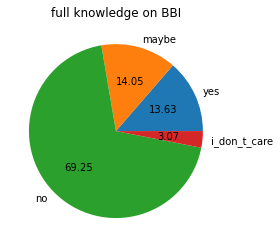

In [59]:
data1=['yes','maybe','no','i_don_t_care']
y=[782, 806, 3972, 176]
plt.pie(y, labels=data1, autopct='%1.2f')
#plt.legend()
plt.title('full knowledge on BBI')
plt.show()

2. What BBi wants to change

In [60]:
# Do Kenyans understand what the BBI entails?
df_new["Do you know what BBI wants to change"].unique()

array(['yes', 'no', 'a_little'], dtype=object)

In [61]:
x=df_new["Do you know what BBI wants to change"].value_counts()
x

no          2748
a_little    1911
yes         1077
Name: Do you know what BBI wants to change, dtype: int64

In [62]:
def InBBI(Dknow):
  if Dknow == 'yes'or 'no' or 'a_little':
    know = df_new["Do you know what BBI wants to change"] == Dknow
    return know.sum()

In [63]:
#kenyans who knows BBI

InBBI('yes')

1077

In [64]:
#who do not know 

InBBI('no')

2748

In [65]:
#who know little about BBI
InBBI('a_little')

1911

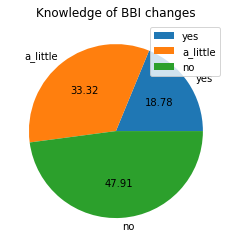

In [66]:
data=['yes','a_little','no']
x=[1077, 1911,2748]
plt.pie(x, labels=data, autopct='%1.2f')
plt.legend()
plt.title('Knowledge of BBI changes')
plt.show()


3 Where do you get your News from

In [67]:
# Where do you get your News from
get_from =df_new["Where do you get your News from"].unique()
get_from

array(['tv', 'radio', 'whatsapp', 'facebook', 'youtube', 'newspapers',
       'my_friends', 'twitter'], dtype=object)

In [68]:
#Where do you get your News from
df_new['Where do you get your News from'].value_counts()

tv            2746
radio         1698
facebook       438
whatsapp       276
twitter        188
newspapers     174
youtube        109
my_friends     107
Name: Where do you get your News from, dtype: int64

4 function to check those who know bbi and where they get news from

In [69]:
#function to check those who know bbi and where they get news from.
def bbiNews(getting):
    bbi_news= df_new.loc[(df['Do you know what BBI wants to change'] == getting)]
    bbi_news1=bbi_news.groupby('Where do you get your News from')[['Do you know what BBI wants to change']].count()
    if getting== 'yes' or 'a_little' or 'no':
        return  bbi_news1['Do you know what BBI wants to change']
        

In [70]:
#those who know about bbi and where they get news from
bbiNews('yes')

Where do you get your News from
facebook       78
my_friends     14
newspapers     67
radio         199
tv            587
twitter        56
whatsapp       50
youtube        26
Name: Do you know what BBI wants to change, dtype: int64

In [71]:
#Where those who do not know BBI and where they get news from
bbiNews('no')


Where do you get your News from
facebook       213
my_friends      70
newspapers      56
radio         1000
tv            1173
twitter         68
whatsapp       123
youtube         45
Name: Do you know what BBI wants to change, dtype: int64

In [72]:
#those who know a little about bbi and where they get knews from
bbiNews('a_little')

Where do you get your News from
facebook      147
my_friends     23
newspapers     51
radio         499
tv            986
twitter        64
whatsapp      103
youtube        38
Name: Do you know what BBI wants to change, dtype: int64

# 2. Which regions are likely to support the BBI?

In [73]:
df_new["Do you support BBI"].unique()

array(['thinking_about_it', 'yes', 'no', 'don_t_care'], dtype=object)

those thinking about it but not decided on whether to support BBi

In [74]:
def support( variable):
  support = df_new["Do you support BBI"] == variable
  if variable == 'yes' or 'no' or 'don_t_care'or 'thinking_about_it':
    return support.sum()

In [75]:
# those thinking about it but not decided on whether to support BBi
support('thinking_about_it')

1128

In [76]:
#those in full support of BBI
support("yes")


1651

In [77]:
#donot fully support BBi
support("no")


2637

In [78]:
#who donot care about BBI
support("don_t_care")


320

Which regions are likely to support the BBI?

In [79]:
# Which regions are likely to support the BBI?
def supportbyregion( variable):
  BBIsupport=df_new.loc[(df['Do you support BBI'] == variable)]
  support = BBIsupport.groupby('County')[['Do you support BBI']].count().sort_values(by='Do you support BBI',ascending=False)
  if variable == 'yes' or 'no' or 'thinking_about_it' or 'don_t_care':
    return support['Do you support BBI']

In [80]:
supportbyregion('yes')

County
migori         171
narok          155
kisumu         124
nairobi        119
laikipia       115
kisii          114
kirinyaga       96
kitui           90
trans_nzoia     71
kiambu          65
kakamega        63
isiolo          63
nyeri           61
machakos        58
nakuru          58
uasin_gishu     54
mombasa         53
embu            52
kericho         36
meru            33
Name: Do you support BBI, dtype: int64

In [81]:
supportbyregion('thinking_about_it')

County
mombasa        105
embu            94
uasin_gishu     87
kirinyaga       80
kiambu          79
machakos        72
trans_nzoia     69
kakamega        67
nairobi         53
nakuru          48
meru            45
kericho         44
laikipia        43
kisumu          43
kisii           43
nyeri           37
migori          36
kitui           36
isiolo          24
narok           23
Name: Do you support BBI, dtype: int64

In [82]:
supportbyregion('don_t_care')

County
machakos       35
kitui          35
nairobi        33
kiambu         25
kakamega       23
kisii          23
kericho        21
nyeri          20
uasin_gishu    17
kisumu         11
narok          11
mombasa         9
kirinyaga       9
laikipia        8
meru            8
nakuru          8
isiolo          6
migori          6
trans_nzoia     6
embu            6
Name: Do you support BBI, dtype: int64

In [83]:
supportbyregion('no')

County
meru           194
nyeri          184
kericho        183
isiolo         176
nakuru         168
trans_nzoia    159
embu           151
kitui          139
machakos       138
uasin_gishu    134
kiambu         129
laikipia       122
mombasa        113
kirinyaga      105
kakamega       105
nairobi        101
kisumu          99
narok           90
kisii           87
migori          60
Name: Do you support BBI, dtype: int64

# 3. How does BBI support compare based on Gender, Age group and Monthly income?

In [84]:
# How does BBI support compare based on Gender, Age group and Monthly income?
#support on BBI basing on Gender.
df_new.groupby([ "Gender","Do you support BBI"])["Do you support BBI"].count()

Gender  Do you support BBI
female  don_t_care             158
        no                    1083
        thinking_about_it      539
        yes                    570
male    don_t_care             162
        no                    1554
        thinking_about_it      587
        yes                   1080
other   thinking_about_it        2
        yes                      1
Name: Do you support BBI, dtype: int64

In [85]:
#age group support
df_new.groupby([ "Age","Do you support BBI"])["Do you support BBI"].count()

Age      Do you support BBI
18-24    don_t_care             63
         no                    468
         thinking_about_it     184
         yes                   261
25-30    don_t_care             79
         no                    662
         thinking_about_it     294
         yes                   371
31-35    don_t_care             62
         no                    505
         thinking_about_it     206
         yes                   304
36-40    don_t_care             41
         no                    399
         thinking_about_it     174
         yes                   266
41-50    don_t_care             35
         no                    344
         thinking_about_it     146
         yes                   257
51-60    don_t_care             23
         no                    147
         thinking_about_it      74
         yes                   120
over-61  don_t_care             12
         no                     97
         thinking_about_it      44
         yes               

Demographics 

In [88]:
#Getting particular gender of those who participated in the questionare 
df_new.groupby(['Gender'])['Gender'].count()

Gender
female    2350
male      3383
other        3
Name: Gender, dtype: int64

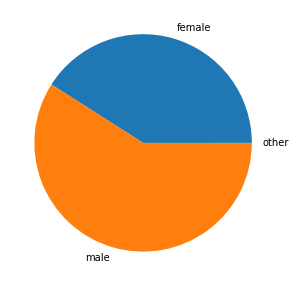

In [101]:
# Creating dataset
gender = ['female', 'male', 'other']
  
data = [2350, 3383, 3]
  
# Creating plot
fig = plt.figure(figsize =(8, 5))
plt.pie(data, labels = gender)

# show plot
plt.show()

In [ ]:
#monthly income support
df_new.groupby([ "Monthly Income (Kshs)","Do you support BBI"])["Do you support BBI"].count()

In [ ]:
#support basing on occupation
df_new.groupby([ "Occupation","Do you support BBI"])["Do you support BBI"].count()

In [ ]:
df_new.groupby([ "Highest Level of Education Attained","Do you support BBI"])["Do you support BBI"].count()

In [ ]:
#visualization 
plt.bar(df['Gender'], df['Do you support BBI']=='yes')

plt.title('Gender Vs Do you support BBI', fontsize=14)
plt.ylabel('Do you support BBI', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.grid(False)
plt.show()

In [ ]:
# x = [df_new['Do you support BBI'].unique()]
# y1 = df['Gender']=='male'.sum()
# y2 = df['Gender']=='female'.sum()
# y3 = df['Gender']=='other'.sum()

  
# # plot bars in stack manner
# plt.bar(x, y1, color='r')
# plt.bar(x, y2, bottom=y1, color='b')
# plt.bar(x, y3, bottom=y1+y2, color='y')

# # plt.xlabel("Teams")
# # plt.ylabel("Score")
# # plt.legend(["Round 1", "Round 2", "Round 3", "Round 4"])
# plt.title("Scores by Teams in 4 Rounds")
# plt.show()

In [ ]:
# y2 = df_new['Gender']=='female'
# y2.sum()



In [ ]:
df_new['Will you vote in the Refere'].unique()

# 4. Will a voter  participate in a referendum & how they would vote?

In [ ]:
# Will a voter  participate in a referendum & how they would vote?
def voting( variable):
  vote = df_new["Will you vote in the Refere"] == variable
  if variable == 'yes' or 'no' or 'undecided'or 'other':
    return vote.sum()

In [ ]:
#those who will vote
voting('yes')

In [ ]:
# those not decide to vote
voting('undecided')

In [ ]:
#those who will not vote
voting('no')

In [ ]:
#others 
voting('other')

In [ ]:
df_new['How will you vote in the Referendum'].unique()

In [ ]:
#How will they vote in referundum
def Howillvote( variable):
  vote = df_new["How will you vote in the Referendum"] == variable
  if variable == 'yes__for_it' or 'no__against_it' or 'still_deciding'or 'i_will_not_vote':
    return vote.sum()

In [ ]:
#those voting for it.
Howillvote('yes__for_it')

In [ ]:
#those who will not vote
Howillvote('no__against_it')

In [ ]:
#those still deciding
Howillvote('still_deciding')

In [ ]:
#those who will completely  not vote
Howillvote('i_will_not_vote')

In [ ]:
Hustlers= df_new.loc[(df['Do you support the Hustler Nation'] == 'yes')]
hustlerSupport=Hustlers.groupby('If elections are today who would you vote for')[['Do you support the Hustler Nation']].count()
hustlerSupport['Do you support the Hustler Nation']

In [ ]:
df_new.groupby([ "Will you vote in the Refere","How will you vote in the Referendum"])["Will you vote in the Refere"].count()

#5.  How are Kenyans who voted in 2017 likely to vote in the referendum?

In [ ]:
# How are Kenyans who voted in 2017 likely to vote in the referendum?
df_new.groupby([ "Did you vote in 2017","Will you vote in the Refere"])["Did you vote in 2017"].count()

In [ ]:
df_new.groupby([ "Did you vote in 2017","How will you vote in the Referendum"])["Did you vote in 2017"].count()

# Does the BBI or Hustler Nation support influence voter preference in 2022?

In [ ]:
# Does the BBI or Hustler Nation support influence voter preference in 2022?
#yes supporting BBI and If elections are today who would you vote for
BBIs= df_new.loc[(df['Do you support BBI'] == 'yes')]
bbiSupport=BBIs.groupby('If elections are today who would you vote for')[['Do you support BBI']].count()
bbiSupport['Do you support BBI']

In [ ]:
a=[fred_matiangi,gideon_moi,kalonzo_musyoka      56
martha_karua         16
musalia_mudavadi     99
none                155
peter_kenneth        25
raila_odinga        784
william_ruto ]

In [ ]:
#supporting hustler nation and if election were to be held they will vote for who.
Hustlers= df_new.loc[(df['Do you support the Hustler Nation'] == 'yes')]
hustlerSupport=Hustlers.groupby('If elections are today who would you vote for')[['Do you support the Hustler Nation']].count()
hustlerSupport['Do you support the Hustler Nation']